In [52]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from tqdm import tqdm

plt.rcParams['figure.dpi'] = 200

In [53]:
N = 100
x_min = 0
x_max = 1
dx = (x_max-x_min)/N
x = np.linspace(x_min, x_max, N+1)
dt = 0.0001
S = 50000
kappa = 1
multiplier = 1.08
omega_0 = 3*np.pi*np.pi/2
omega = multiplier*omega_0
tau = 0
n = 1

In [54]:
Psi_re = np.sqrt(2)*np.sin(n*np.pi*x)
Psi_im = np.zeros_like(x)

In [55]:

H_re = np.zeros(N+1)
H_re[0] = 0
H_re[N] = 0

for i in range(1, N):
    H_re[i] = -0.5 * ((Psi_re[i+1]+Psi_re[i-1]-2*Psi_re[i]) /
                      (dx*dx))+kappa*(i*dx-0.5)*Psi_re[i]*np.sin(omega*tau)

In [56]:

H_im = np.zeros(N+1)
H_im[0] = 0
H_im[N] = 0

for i in range(1, N):
    H_im[i] = -0.5 * ((Psi_im[i+1]+Psi_im[i-1]-2*Psi_im[i]) /
                      (dx*dx))+kappa*(i*dx-0.5)*Psi_im[i]*np.sin(omega*tau)

In [57]:
norm = []
x_s = []
E = []

for i in tqdm(range(S)):
    Psi_re = Psi_re + H_im*dt/2
    tau = tau + dt/2

    steps = range(1,N)

    for i in steps:
        H_re[i] = -0.5 * ((Psi_re[i+1] + Psi_re[i-1] - 2*Psi_re[i]) / dx/dx) + \
            kappa * (i*dx - 0.5) * Psi_re[i] * np.sin(omega * tau)
    Psi_im = Psi_im - H_re*dt

    tau = tau + dt/2
    
    for i in steps:
        H_im[i] = -0.5 * ((Psi_im[i+1] + Psi_im[i-1] - 2*Psi_im[i]) / dx/dx) + \
            kappa * (i*dx - 0.5) * Psi_im[i] * np.sin(omega * tau)
    Psi_re = Psi_re + H_im*dt/2

    for i in steps:
        H_re[i] = -0.5 * ((Psi_re[i+1] + Psi_re[i-1] - 2*Psi_re[i]) / dx/dx) + \
            kappa * (i*dx - 0.5) * Psi_re[i] * np.sin(omega * tau)

    norm.append(dx*np.sum(Psi_re*Psi_re + Psi_im*Psi_im))
    x_s.append(dx*np.sum(x*(Psi_re*Psi_re+Psi_im*Psi_im)))
    E.append(dx*np.sum(Psi_re*H_re+Psi_im*H_im))

100%|██████████| 50000/50000 [00:27<00:00, 1822.35it/s]


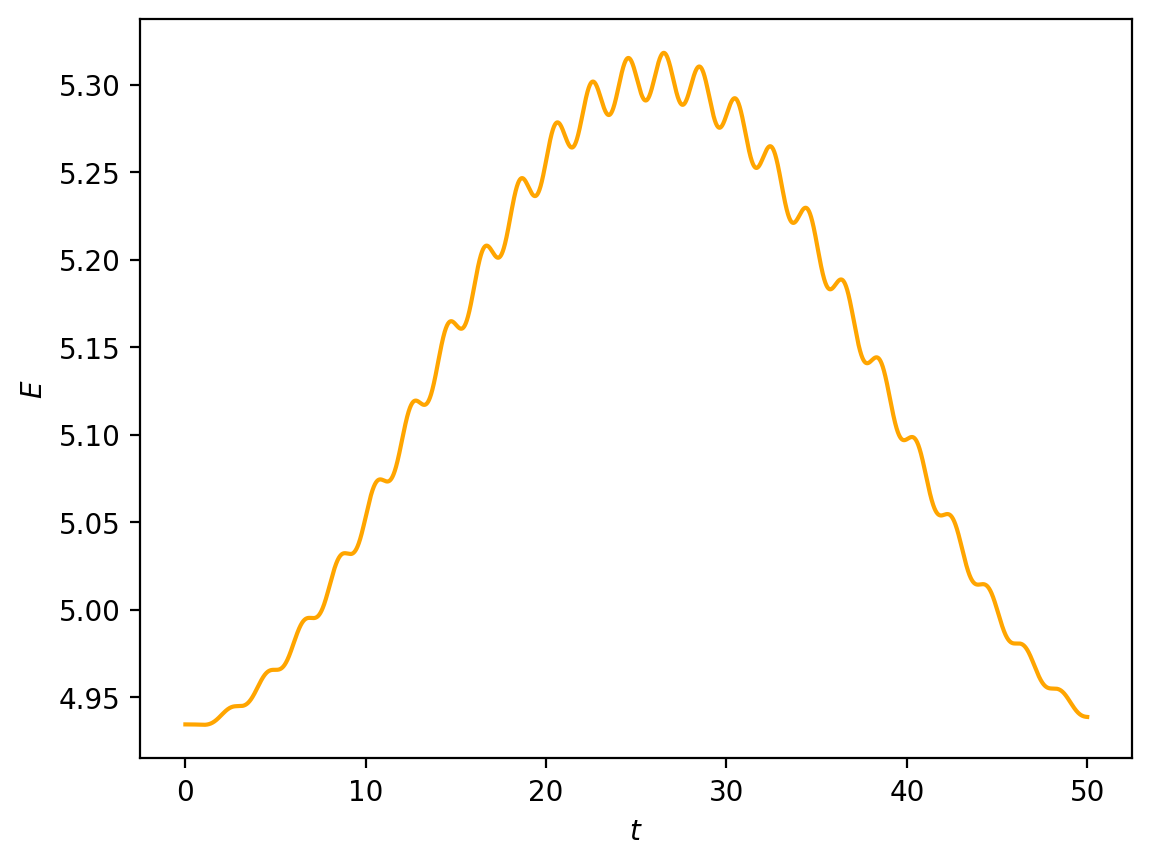

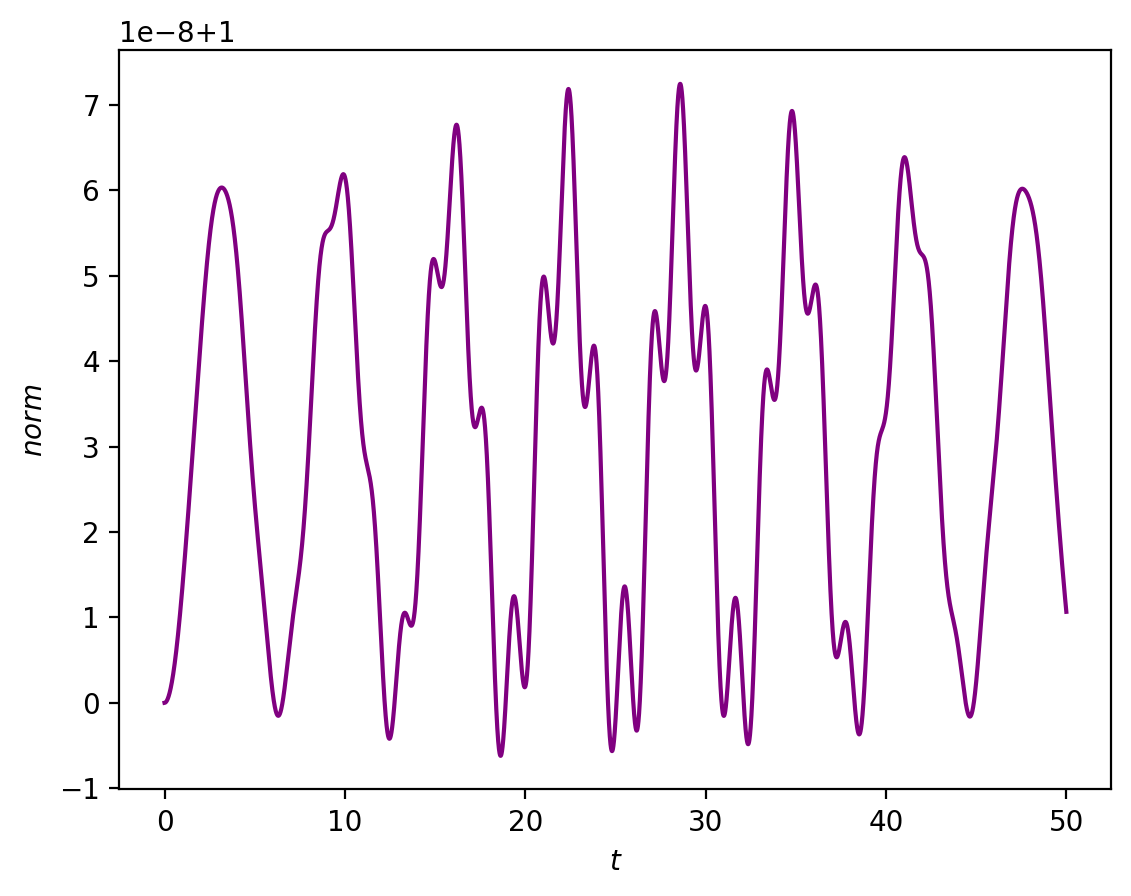

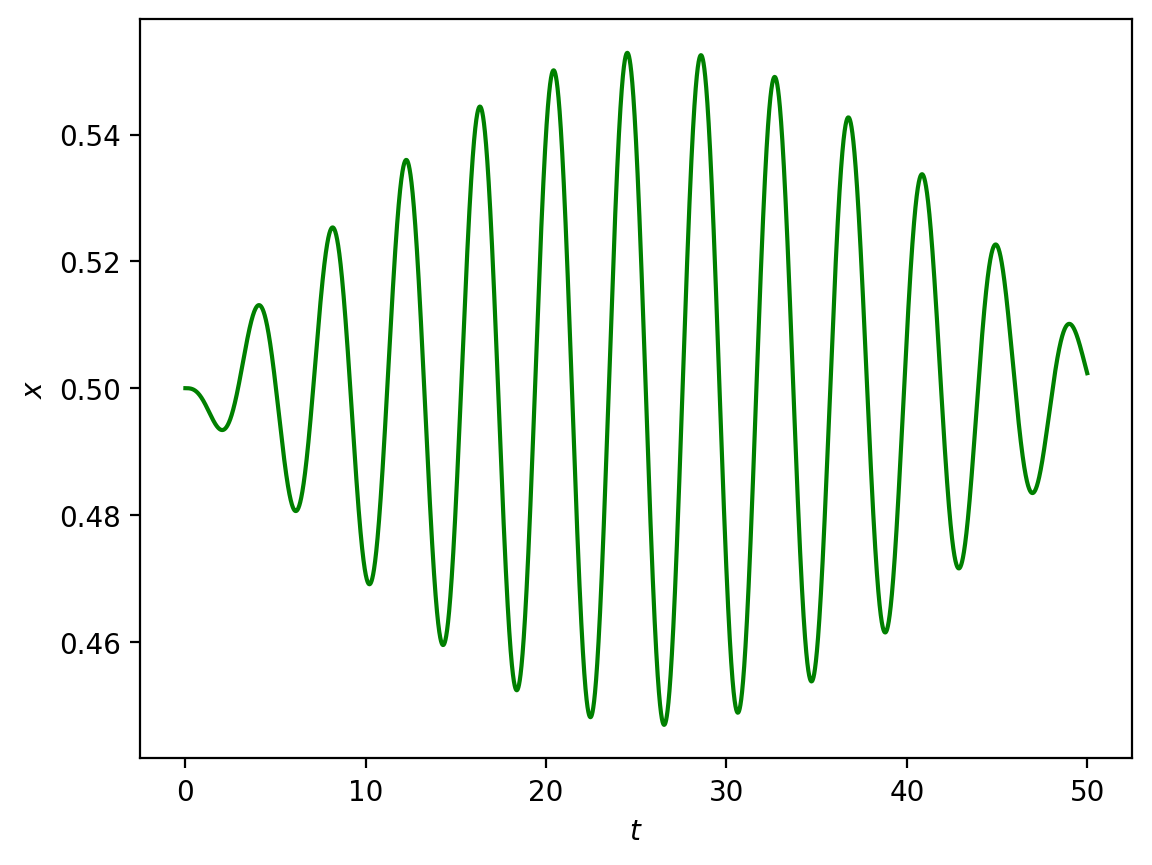

In [58]:
x_t = np.linspace(0, 50, S)
plt.plot(x_t, E, color='orange')
plt.xlabel(r'$t$')
plt.ylabel(r'$E$')
plt.savefig('E_on_t.png')
plt.show()


plt.plot(x_t, norm, color='purple')
plt.xlabel(r'$t$')
plt.ylabel(r'$norm$')
plt.savefig('norm_on_t.png')
plt.show()

plt.plot(x_t, x_s, color='green')
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.savefig('x_on_t.png')
plt.show()

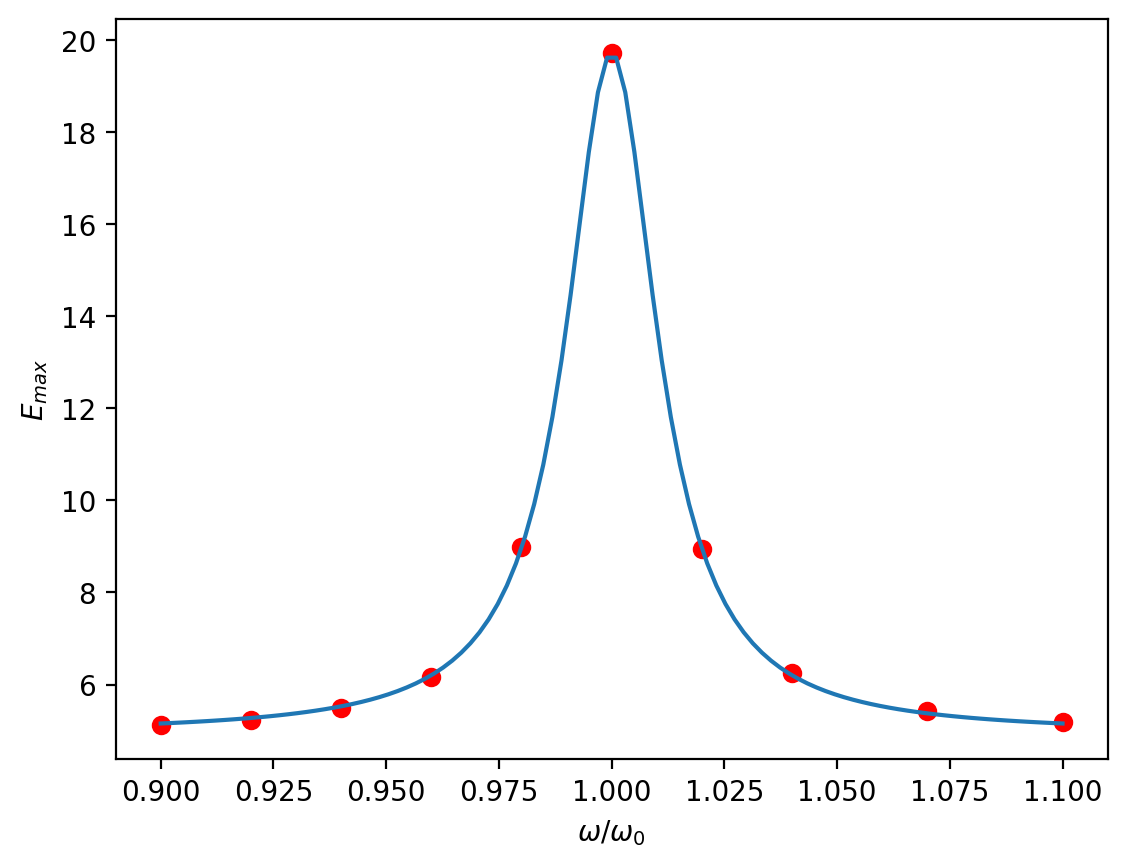

In [59]:
x = [0.9, 0.92, 0.94, 0.96, 0.98, 1, 1.02, 1.04, 1.07, 1.1]
y = [5.12, 5.24, 5.49, 6.16, 8.98, 19.72, 8.95, 6.26, 5.43, 5.19]

def fit(x, C1, C2, gamma):
    return C1+4*C2*gamma/(4*(x-1)**2+gamma)

params, _ = scipy.optimize.curve_fit(fit, x, y)
C1, C2, gamma = params

plt.scatter(x, y, color='red')
x_smooth = np.linspace(0.9, 1.1, 100)
plt.plot(x_smooth, fit(x_smooth, C1, C2, gamma))
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$E_{max}$')
plt.savefig('schrodinger_resonance_fit.png')